<a href="https://colab.research.google.com/github/Unaixafaheem/Artificial-Intelligence/blob/main/Task_3_California_Housing_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Install seaborn if not already available (Colab usually has it)
!pip install seaborn --quiet


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, confusion_matrix, classification_report
)

sns.set(style="whitegrid")


In [5]:
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target  # Median house value (in 100,000s of dollars)

df_housing = X.copy()
df_housing["MedHouseVal"] = y

print("Shape:", df_housing.shape)
df_housing.head()


Shape: (20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


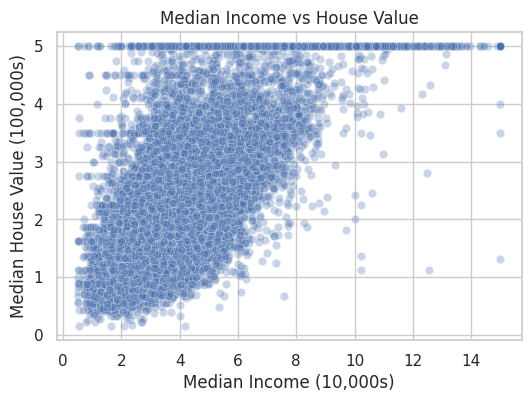

In [6]:
# Scatter: Median Income vs House Value
plt.figure(figsize=(6, 4))
sns.scatterplot(x="MedInc", y="MedHouseVal", data=df_housing, alpha=0.3)
plt.title("Median Income vs House Value")
plt.xlabel("Median Income (10,000s)")
plt.ylabel("Median House Value (100,000s)")
plt.show()


In [7]:
selected_features = X.columns  # use all
X_selected = X[selected_features]

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (16512, 8)
Test shape: (4128, 8)


In [8]:
# Scale features
scaler_reg = StandardScaler()
X_train_scaled = scaler_reg.fit_transform(X_train)
X_test_scaled = scaler_reg.transform(X_test)

# Define multiple regression models
reg_models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=150, random_state=42, n_jobs=-1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN (k=5)": KNeighborsRegressor(n_neighbors=5),
    "SVR (RBF)": SVR()
}

reg_results = []

for name, model in reg_models.items():
    # Some models (like trees, RF, KNN, SVR) work fine with scaled data
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    reg_results.append({
        "Model": name,
        "RMSE": rmse,
        "R2 Score": r2
    })

reg_results_df = pd.DataFrame(reg_results).sort_values(by="R2 Score", ascending=False)
reg_results_df


,Model,RMSE,R2 Score
1,Random Forest,0.504457,0.805804
4,SVR (RBF),0.597498,0.727563
3,KNN (k=5),0.657588,0.670010
2,Decision Tree,0.702829,0.623042
0,Linear Regression,0.745581,0.575788


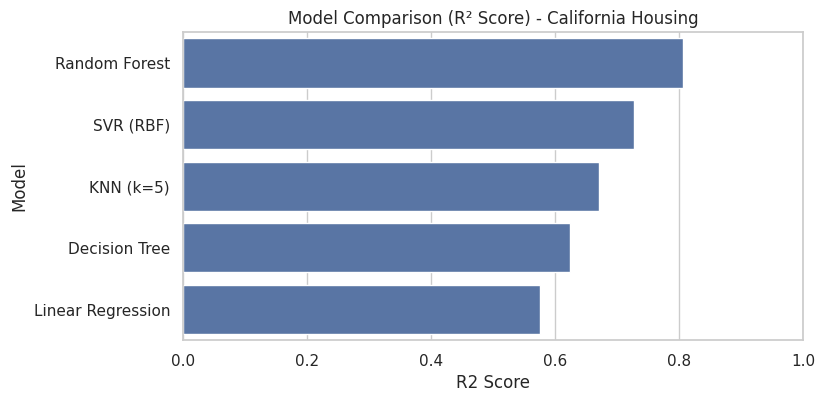

In [9]:
plt.figure(figsize=(8, 4))
sns.barplot(x="R2 Score", y="Model", data=reg_results_df, orient="h")
plt.title("Model Comparison (R² Score) - California Housing")
plt.xlim(0, 1)
plt.show()


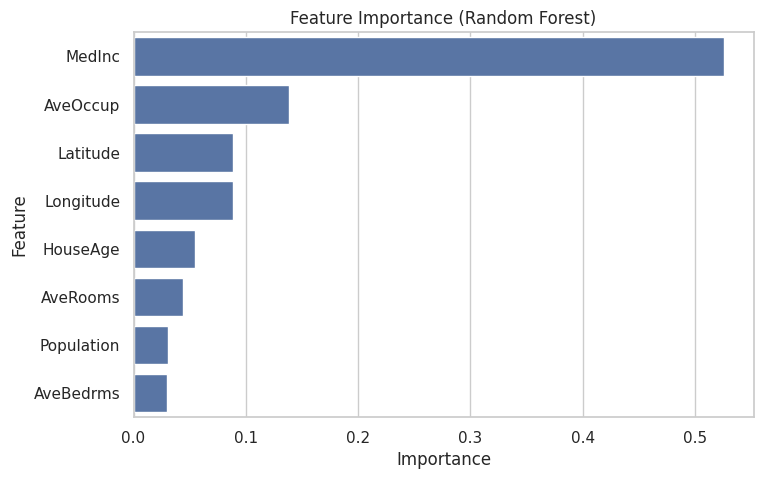

,Feature,Importance
0,MedInc,0.525854
5,AveOccup,0.138085
6,Latitude,0.088463
7,Longitude,0.088402
1,HouseAge,0.054535
2,AveRooms,0.044282
4,Population,0.030712
3,AveBedrms,0.029667


In [10]:
# Use the already trained Random Forest
best_rf = reg_models["Random Forest"]

importances = best_rf.feature_importances_
feature_names = selected_features

feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df)
plt.title("Feature Importance (Random Forest)")
plt.show()

feat_imp_df


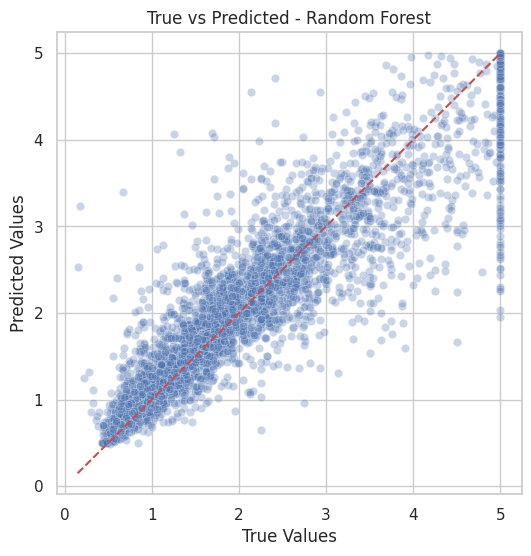

In [11]:
# Use the best model by R2 (from the table)
best_model_name = reg_results_df.iloc[0]["Model"]
best_model = reg_models[best_model_name]

y_pred_best = best_model.predict(X_test_scaled)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"True vs Predicted - {best_model_name}")
plt.show()


In [12]:
# Example new house: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]
new_house = np.array([[5.0, 20.0, 5.5, 1.0, 1000.0, 3.0, 34.0, -118.0]])
new_house_scaled = scaler_reg.transform(new_house)

new_price = best_model.predict(new_house_scaled)[0]
print(f"Predicted house price: {new_price:.3f} (in 100,000s of dollars)")


Predicted house price: 2.212 (in 100,000s of dollars)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
